In [ ]:
### Analysis of Ensemble 18_2, based on ensemble member from Ensemble 18 that gave the best fit to the observations
### constant FeC ratio at 20E-6, constant µ0 at 0.01 d-1
### 2 different m_l sampled
### investigating the effect of PGE, Phi, Ligphi, K_LDOC, K_Fe, rCLig, kappa
### ligand lifetime in the deep box is enhanced by a factor of 10
### beta = 1E12 (determined before that there is not a huge difference, but this is closer to the observations)


In [1]:
### Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib as mpl

from matplotlib.colors import ListedColormap, BoundaryNorm, LogNorm
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon

plt.rcParams['text.usetex'] = True

# Enable the use of LaTeX for rendering text labels
mpl.rcParams['text.usetex'] = True

# Set the font family to sans-serif (Helvetica, Arial, etc.)
mpl.rcParams['font.family'] = 'sans-serif'

# Set the font style for the labels (optional)
mpl.rcParams['font.style'] = 'normal'

# Add a LaTeX preamble to change font family for numbers to sans-serif
mpl.rcParams['text.latex.preamble'] = r'\usepackage{sfmath}'


os.getcwd()


'c:\\Users\\konst\\Documents\\_Master_Thesis\\Code\\microCOSM_deep\\Ensembles13_to_18'

In [2]:
data18_2 = pd.read_csv('Ensemble18_2.csv', sep=' ')

In [3]:
data18_2.head()

id    dt(s)   t(yr)  rFeC_pb           mu0           m_l  m_q  kappa  \
0  60000.0  43200.0  1000.0  0.00002  1.157407e-07  1.157407e-10  0.0    1.0   
1  60001.0  43200.0  1000.0  0.00002  1.157407e-07  1.157407e-10  0.0    1.0   
2  60002.0  43200.0  1000.0  0.00002  1.157407e-07  1.157407e-10  0.0    1.0   
3  60003.0  43200.0  1000.0  0.00002  1.157407e-07  1.157407e-10  0.0    1.0   
4  60004.0  43200.0  1000.0  0.00002  1.157407e-07  1.157407e-10  0.0    1.0   

          kfe_p   kldoc_p  ...       DIC(2)       DIC(3)       ALK(1)  \
0  1.024500e-07  0.010245  ...  2101.148586  2385.361631  2397.672717   
1  1.024500e-07  0.010245  ...  2099.658292  2384.788091  2398.476854   
2  1.024500e-07  0.010245  ...  2104.177824  2386.431057  2396.012908   
3  1.024500e-07  0.010245  ...  2100.091105  2384.953011  2398.244131   
4  1.024500e-07  0.010245  ...  2099.132993  2384.579609  2398.758404   

        ALK(2)       ALK(3)   OCPCO2(1)   OCPCO2(2)   OCPCO2(3)  ATPCO2  Limit  
0  2388.387621  2399.304413  285.356508  266.884009  866.328149     0.0  324.0  
1  2388.409885  2399.302553  286.926698  264.742351  861.364269     0.0  323.0  
2  2388.340514  2399.308229  282.108858  271.305478  875.655458     0.0  324.0  
3  2388.403474  2399.303092  286.472087  265.362090  862.788772     0.0  323.0  
4  2388.417608  2399.301899  287.476002  263.992634  859.566593     0.0  323.0  

[5 rows x 45 columns]

In [5]:
data18_2['m_l'].value_counts()

1.157407e-10    4374
5.787037e-10    4374
5.787037e-11     427
Name: m_l, dtype: int64

In [6]:
### remove all the rows with m_l smaller than 1E-10 because this part of the ensemble is unfinished

data18_2 = data18_2[data18_2.m_l > 1E-10]

In [7]:
data18_2['m_l'].value_counts()

1.157407e-10    4374
5.787037e-10    4374
Name: m_l, dtype: int64

In [8]:
data18_2['fe_lim_p(1)'] = (data18_2['Fe(1)'] / (data18_2['Fe(1)'] + data18_2['kfe_p'] * 1e6)) / (data18_2['LDOC(1)'] / (data18_2['LDOC(1)'] + data18_2['kldoc_p'] * 1e3)) < 1
data18_2['fe_lim_p(2)'] = (data18_2['Fe(2)'] / (data18_2['Fe(2)'] + data18_2['kfe_p'] * 1e6)) / (data18_2['LDOC(2)'] / (data18_2['LDOC(2)'] + data18_2['kldoc_p'] * 1e3)) < 1
data18_2['fe_lim_p(3)'] = (data18_2['Fe(3)'] / (data18_2['Fe(3)'] + data18_2['kfe_p'] * 1e6)) / (data18_2['LDOC(3)'] / (data18_2['LDOC(3)'] + data18_2['kldoc_p'] * 1e3)) < 1


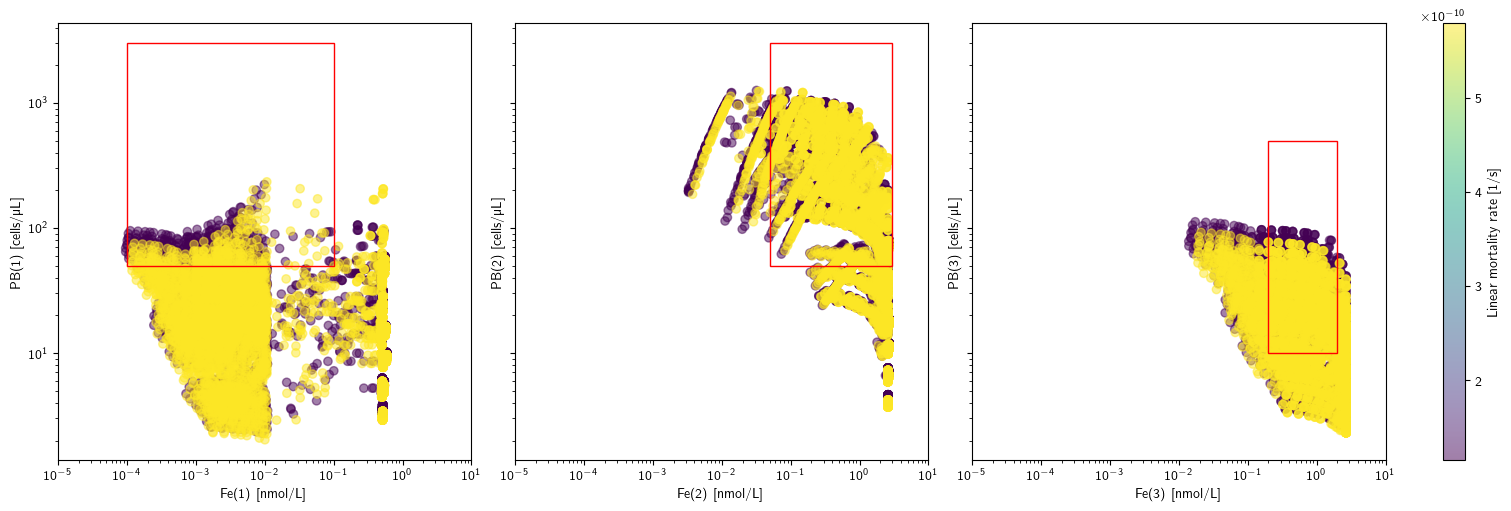

In [30]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data18_2['Fe(1)'], data18_2['PB(1)'], c=data18_2['m_l'], cmap='viridis', marker='o', alpha=0.5)
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data18_2['Fe(2)'], data18_2['PB(2)'], c=data18_2['m_l'], cmap='viridis', marker='o', alpha=0.5)
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data18_2['Fe(3)'], data18_2['PB(3)'], c=data18_2['m_l'], cmap='viridis', marker='o', alpha=0.5)
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Linear mortality rate [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Keep in mind that the growth rate is very low, so it is not surprising that most of the datapoints actually fall into
### The observed range
### The linear mortality rate is partly determining the prokaryotic abundance



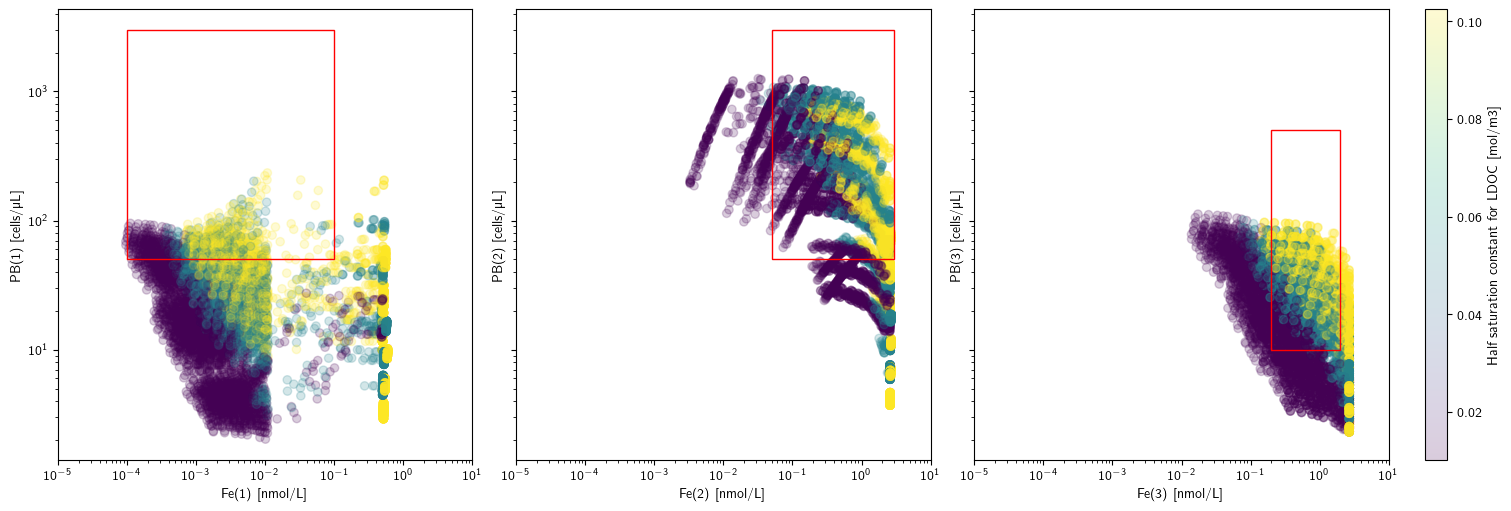

In [33]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data18_2['Fe(1)'], data18_2['PB(1)'], c=data18_2['kldoc_p'], cmap='viridis', marker='o', alpha=0.2)
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data18_2['Fe(2)'], data18_2['PB(2)'], c=data18_2['kldoc_p'], cmap='viridis', marker='o', alpha=0.2)
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data18_2['Fe(3)'], data18_2['PB(3)'], c=data18_2['kldoc_p'], cmap='viridis', marker='o', alpha=0.2)
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Half saturation constant for LDOC [mol/m3]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()




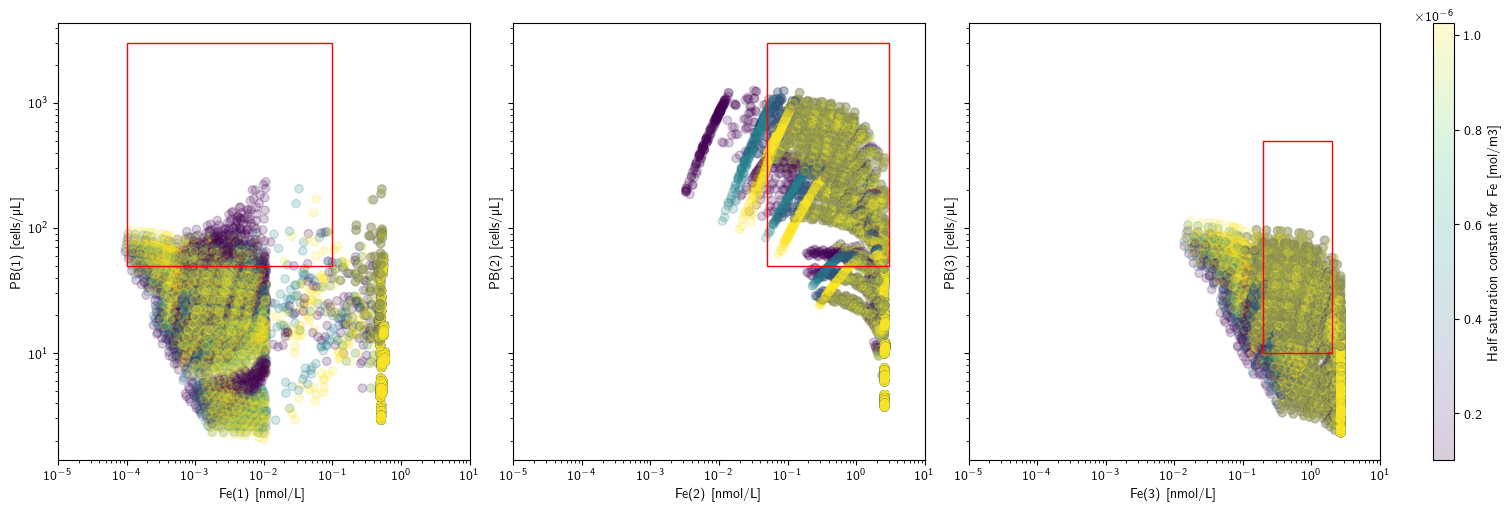

In [35]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data18_2['Fe(1)'], data18_2['PB(1)'], c=data18_2['kfe_p'], cmap='viridis', marker='o', alpha=0.2)
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data18_2['Fe(2)'], data18_2['PB(2)'], c=data18_2['kfe_p'], cmap='viridis', marker='o', alpha=0.2)
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data18_2['Fe(3)'], data18_2['PB(3)'], c=data18_2['kfe_p'], cmap='viridis', marker='o', alpha=0.2)
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Half saturation constant for Fe [mol/m3]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()




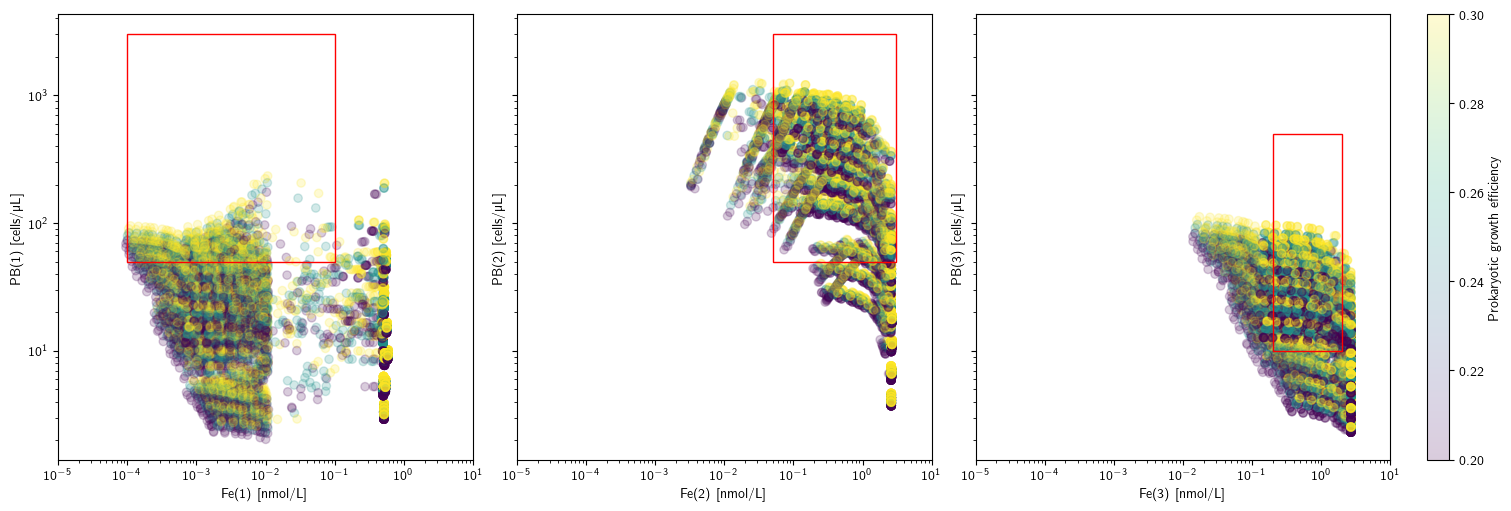

In [37]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data18_2['Fe(1)'], data18_2['PB(1)'], c=data18_2['pge'], cmap='viridis', marker='o', alpha=0.2)
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data18_2['Fe(2)'], data18_2['PB(2)'], c=data18_2['pge'], cmap='viridis', marker='o', alpha=0.2)
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data18_2['Fe(3)'], data18_2['PB(3)'], c=data18_2['pge'], cmap='viridis', marker='o', alpha=0.2)
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Prokaryotic growth efficiency')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()




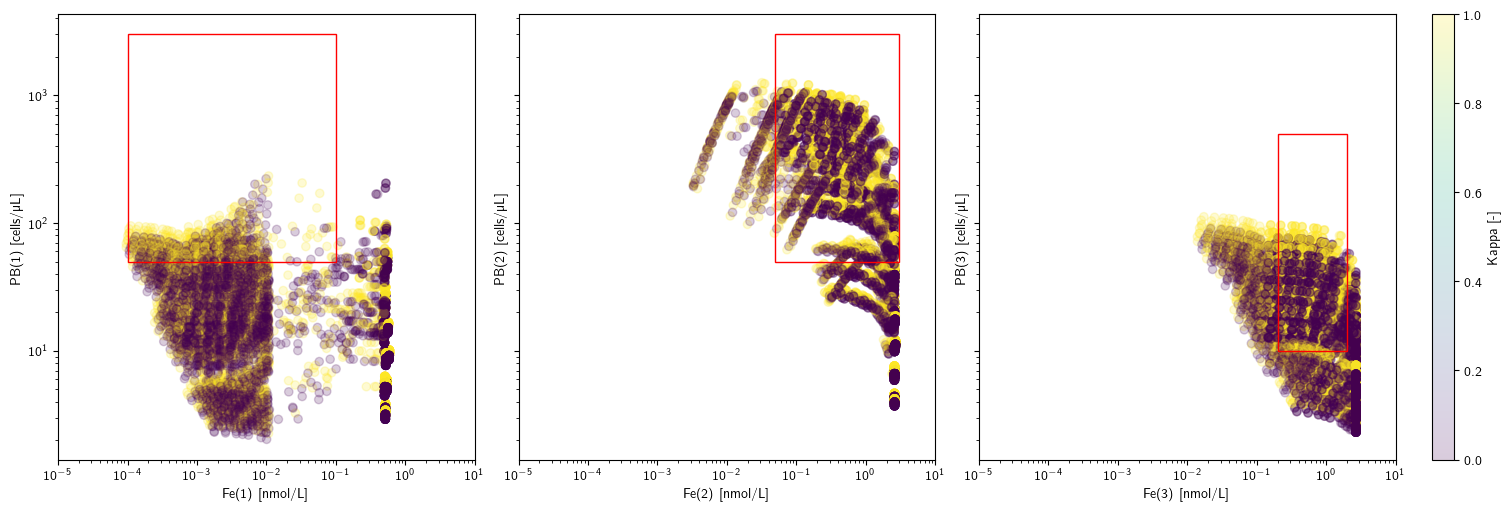

In [38]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data18_2['Fe(1)'], data18_2['PB(1)'], c=data18_2['kappa'], cmap='viridis', marker='o', alpha=0.2)
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data18_2['Fe(2)'], data18_2['PB(2)'], c=data18_2['kappa'], cmap='viridis', marker='o', alpha=0.2)
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data18_2['Fe(3)'], data18_2['PB(3)'], c=data18_2['kappa'], cmap='viridis', marker='o', alpha=0.2)
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Kappa [-]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()




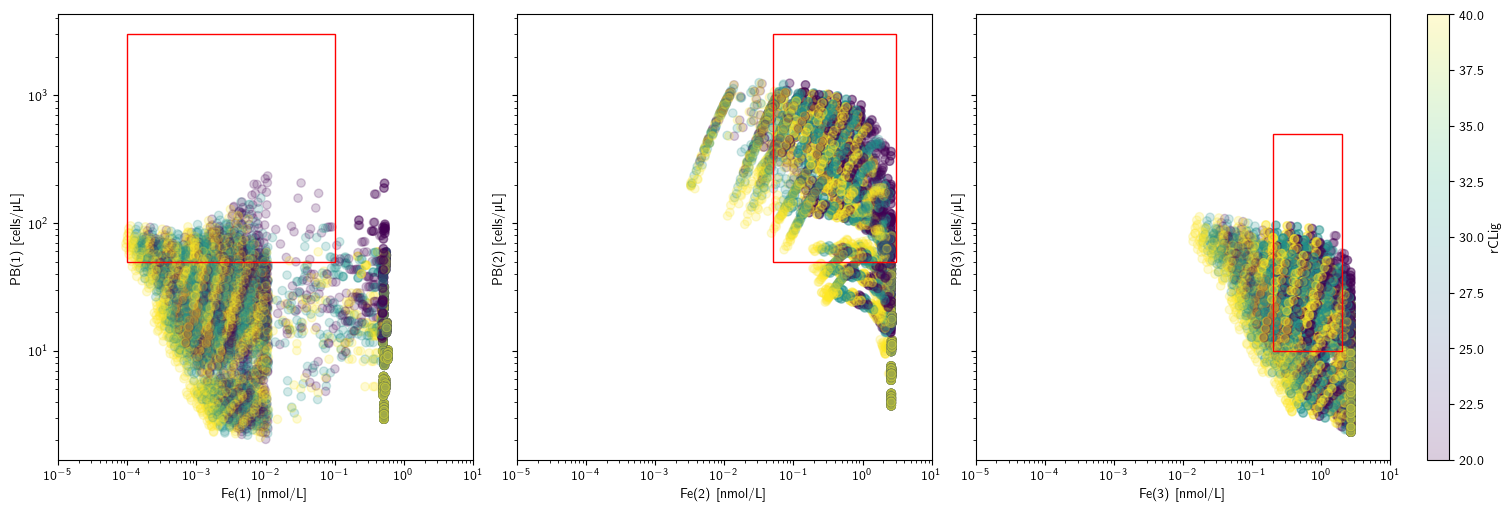

In [40]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data18_2['Fe(1)'], data18_2['PB(1)'], c=data18_2['rCLig'], cmap='viridis', marker='o', alpha=0.2)
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data18_2['Fe(2)'], data18_2['PB(2)'], c=data18_2['rCLig'], cmap='viridis', marker='o', alpha=0.2)
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data18_2['Fe(3)'], data18_2['PB(3)'], c=data18_2['rCLig'], cmap='viridis', marker='o', alpha=0.2)
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('rCLig')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### A lower rCLig favors more PB in the SO, otherwise there is not much influence




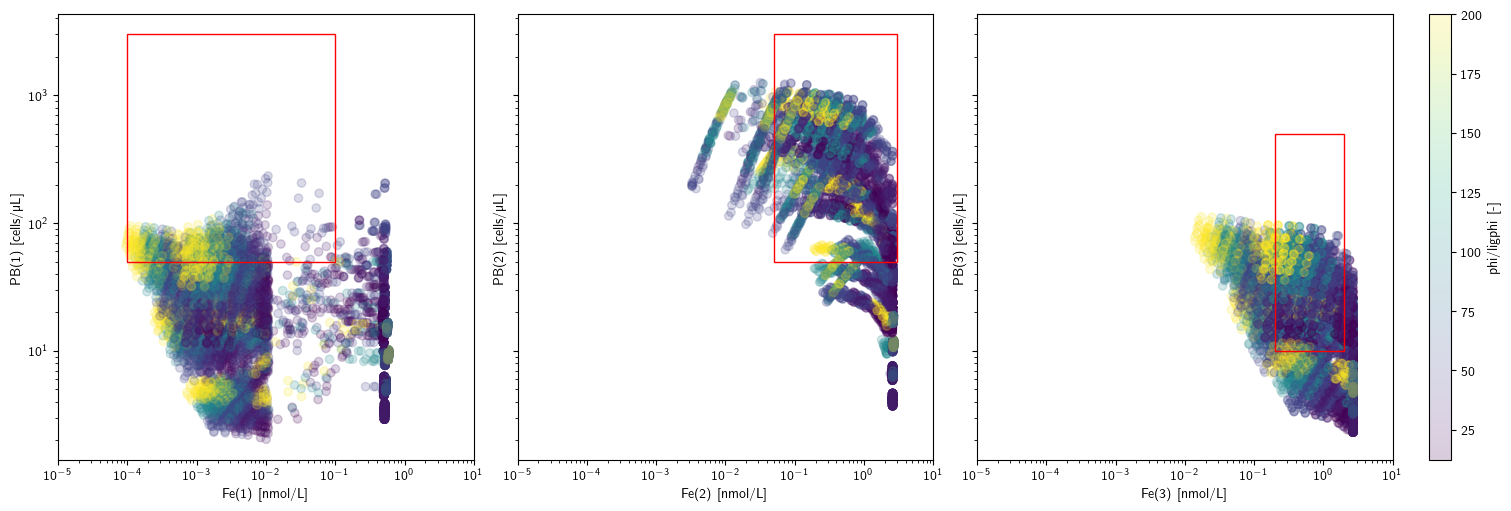

In [43]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data18_2['Fe(1)'], data18_2['PB(1)'], c=data18_2['phi']/data18_2['ligphi'], cmap='viridis', marker='o', alpha=0.2)
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data18_2['Fe(2)'], data18_2['PB(2)'], c=data18_2['phi']/data18_2['ligphi'], cmap='viridis', marker='o', alpha=0.2)
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data18_2['Fe(3)'], data18_2['PB(3)'], c=data18_2['phi']/data18_2['ligphi'], cmap='viridis', marker='o', alpha=0.2)
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi/ligphi [-]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### The phi/ligphi ratio is not really determining here


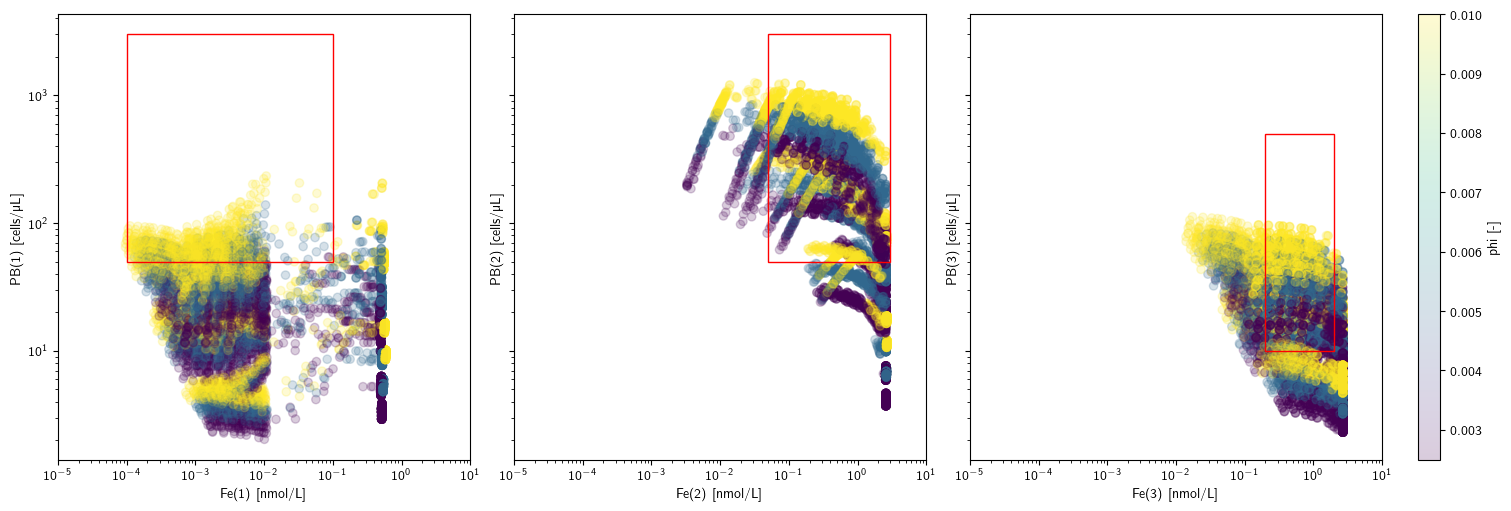

In [45]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data18_2['Fe(1)'], data18_2['PB(1)'], c=data18_2['phi'], cmap='viridis', marker='o', alpha=0.2)
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data18_2['Fe(2)'], data18_2['PB(2)'], c=data18_2['phi'], cmap='viridis', marker='o', alpha=0.2)
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data18_2['Fe(3)'], data18_2['PB(3)'], c=data18_2['phi'], cmap='viridis', marker='o', alpha=0.2)
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi [-]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Phi must be high enough to have enough PB in the Southern Ocean



In [12]:
### Maximum Fe for each box

print(data18_2['Fe(1)'].max(), data18_2['Fe(2)'].max(), data18_2['Fe(3)'].max())


0.5890861158372435 2.6650737202790182 2.6753551529472026


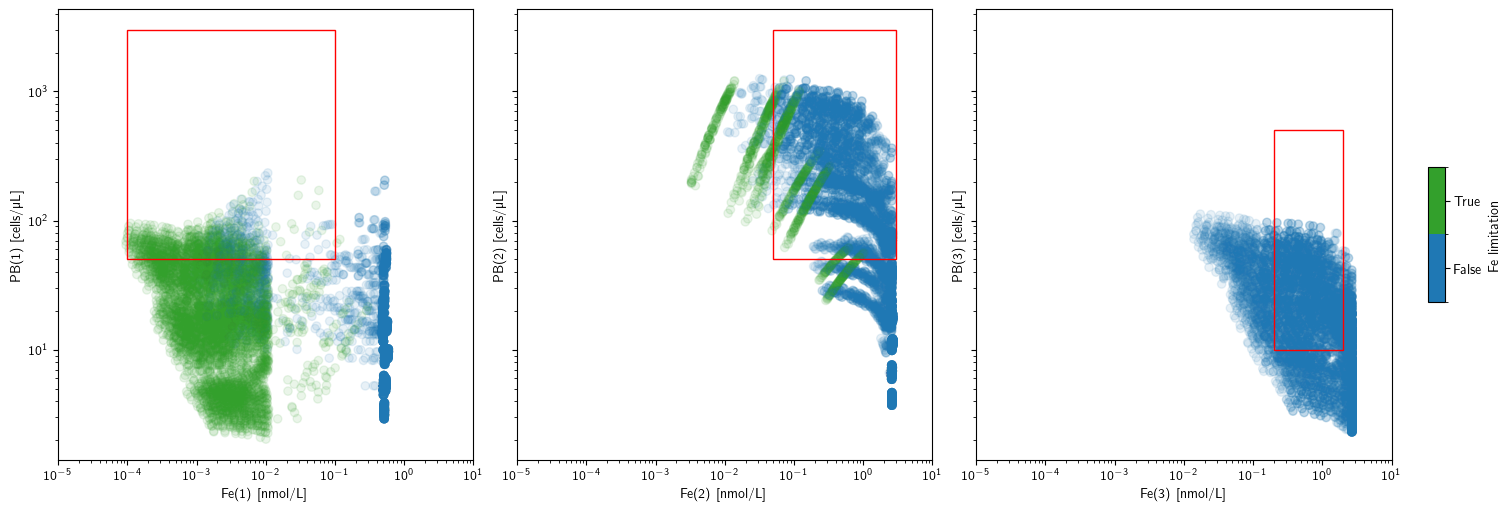

In [29]:
custom_cmap = ListedColormap(['#1f78b4', '#33a02c'])
norm = BoundaryNorm([0, 0.5, 1], custom_cmap.N)
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data18_2['Fe(1)'], data18_2['PB(1)'], c=data18_2['fe_lim_p(1)'], cmap=custom_cmap, marker='o', alpha=0.1)
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data18_2['Fe(2)'], data18_2['PB(2)'], c=data18_2['fe_lim_p(2)'], cmap=custom_cmap, marker='o', alpha=0.1)
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points north of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data18_2['Fe(3)'], data18_2['PB(3)'], c=data18_2['fe_lim_p(3)'], cmap=custom_cmap, marker='o', alpha=0.1)
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


# Create a ScalarMappable
sm = ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=axs, ticks=[0.25, 0.75], orientation='vertical', pad=0.02, aspect=8, shrink=0.3)
cbar.set_ticklabels(['False', 'True'])
cbar.set_label('Fe limitation')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Keep in mind that the growth rate is very low, so it is not surprising that most of the datapoints actually fall into
### The observed range
### In the deep ocean there is always LDOC and no Fe limitation (as determined in the 0-dimensional model)
### In box 2, if there is Fe limitation, there PB and Fe are positively correlated



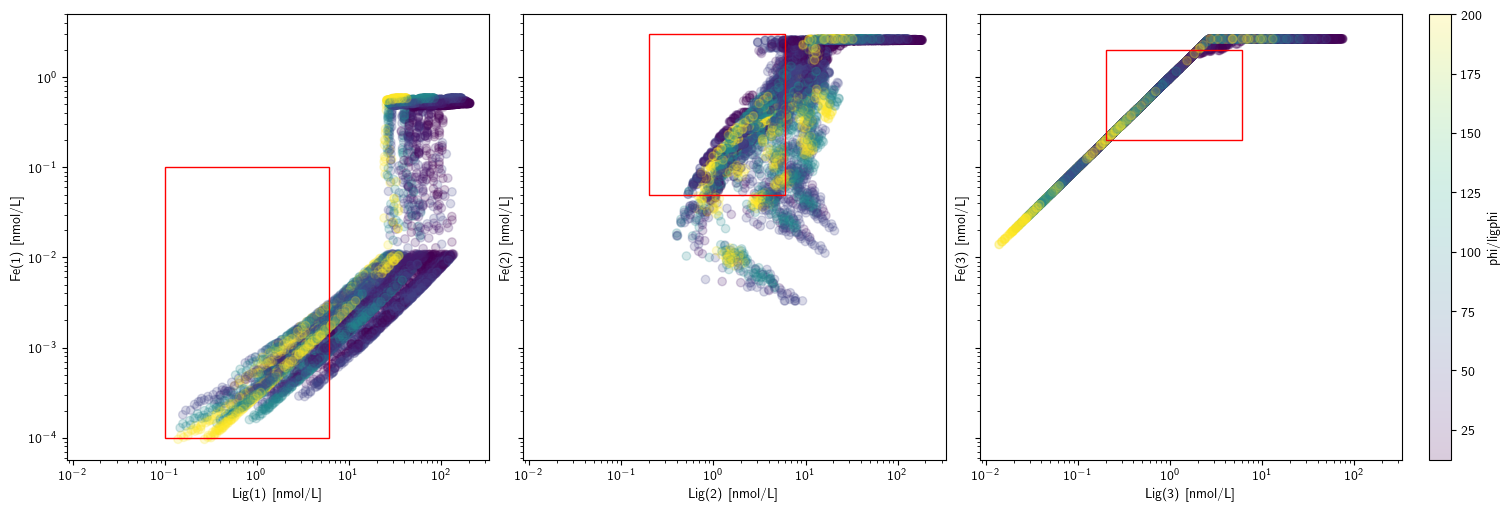

In [27]:
### Scatterplot of Fe(3) vs Lig(3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs Lig(1)
sc1 = axs[0].scatter(data18_2['Lig(1)'], data18_2['Fe(1)'], c=data18_2['phi']/data18_2['ligphi'], cmap='viridis', marker='o', alpha=0.2)
axs[0].set_xlabel('Lig(1) [nmol/L]')
axs[0].set_ylabel('Fe(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((0.1, 1E-4), 6 - 0.1, 0.1 - 1E-4, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Ligand concentration: limited data LFe: n=7 for GEOTRACES ~[0.3 - 1.2] nmol/kg
### L1Fe and L2Fe do not even have any measurements, so there is too much uncertainty to say anything
### https://doi.org/10.1016/S0967-0637(00)00099-6: 0.72±0.23 nM
### https://doi.org/10.1016/j.dsr2.2011.05.028: 0.5 - 1.5 nM (very specific location, Tasmania, Fe concentrations that were measured were higher)
### https://doi.org/10.3389/fmars.2022.948772: has a table with the results of other studies
### Suggested range: 0.04 - 6.5 nmol eq Fe (units due to measurement protocol)
### Conservative range: 0.1 - 6 nmol/kg

# Scatter plot for Fe(2) vs Lig(2)
sc2 = axs[1].scatter(data18_2['Lig(2)'], data18_2['Fe(2)'], c=data18_2['phi']/data18_2['ligphi'], cmap='viridis', marker='o', alpha=0.2)
axs[1].set_xlabel('Lig(2) [nmol/L]')
axs[1].set_ylabel('Fe(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.2, 0.05), 6 - 0.2, 3 - 0.05, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Ligand concentration estimated from GEOTRACES
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range

# Scatter plot for Fe(3) vs Lig(3)
sc3 = axs[2].scatter(data18_2['Lig(3)'], data18_2['Fe(3)'], c=data18_2['phi']/data18_2['ligphi'], cmap='viridis', marker='o', alpha=0.2)
axs[2].set_xlabel('Lig(3) [nmol/L]')
axs[2].set_ylabel('Fe(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 0.2), 6 - 0.2, 2 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi/ligphi')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Interesting in box3, Fe concentration is capped at a maximum value independent of the ligand concentration
### Similar for box2



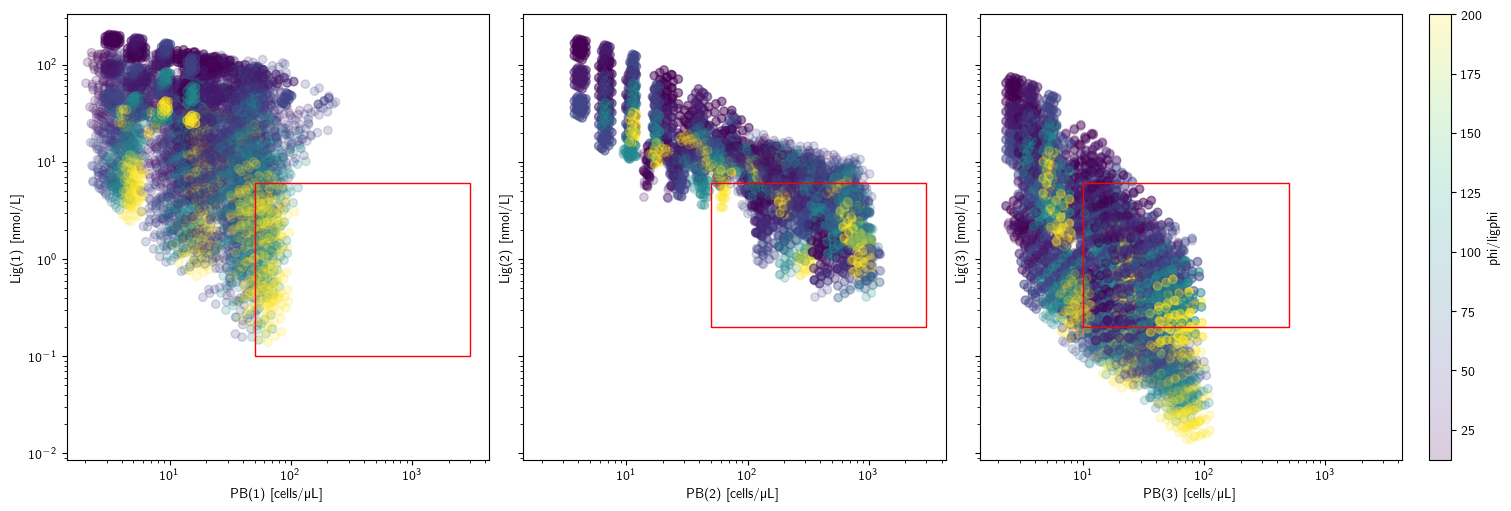

In [49]:
### Scatterplot of Fe(3) vs Lig(3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs Lig(1)
sc1 = axs[0].scatter(data18_2['PB(1)'], data18_2['Lig(1)'], c=data18_2['phi']/data18_2['ligphi'], cmap='viridis', marker='o', alpha=0.2)
axs[0].set_xlabel('PB(1) [cells/µL]')
axs[0].set_ylabel('Lig(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((50, 0.1), 3000 - 50, 6 - 0.1, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Ligand concentration: limited data LFe: n=7 for GEOTRACES ~[0.3 - 1.2] nmol/kg
### L1Fe and L2Fe do not even have any measurements, so there is too much uncertainty to say anything
### https://doi.org/10.1016/S0967-0637(00)00099-6: 0.72±0.23 nM
### https://doi.org/10.1016/j.dsr2.2011.05.028: 0.5 - 1.5 nM (very specific location, Tasmania, Fe concentrations that were measured were higher)
### https://doi.org/10.3389/fmars.2022.948772: has a table with the results of other studies
### Suggested range: 0.04 - 6.5 nmol eq Fe (units due to measurement protocol)
### Conservative range: 0.1 - 6 nmol/kg

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(2) vs Lig(2)
sc2 = axs[1].scatter(data18_2['PB(2)'], data18_2['Lig(2)'], c=data18_2['phi']/data18_2['ligphi'], cmap='viridis', marker='o', alpha=0.2)
axs[1].set_xlabel('PB(2) [cells/µL]')
axs[1].set_ylabel('Lig(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((50, 0.2), 3000 - 50, 6 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Ligand concentration estimated from GEOTRACES
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range

# Scatter plot for Fe(3) vs Lig(3)
sc3 = axs[2].scatter(data18_2['PB(3)'], data18_2['Lig(3)'], c=data18_2['phi']/data18_2['ligphi'], cmap='viridis', marker='o', alpha=0.2)
axs[2].set_xlabel('PB(3) [cells/µL]')
axs[2].set_ylabel('Lig(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((10, 0.2), 500 - 10, 6 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above

cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi/ligphi')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Generally ne


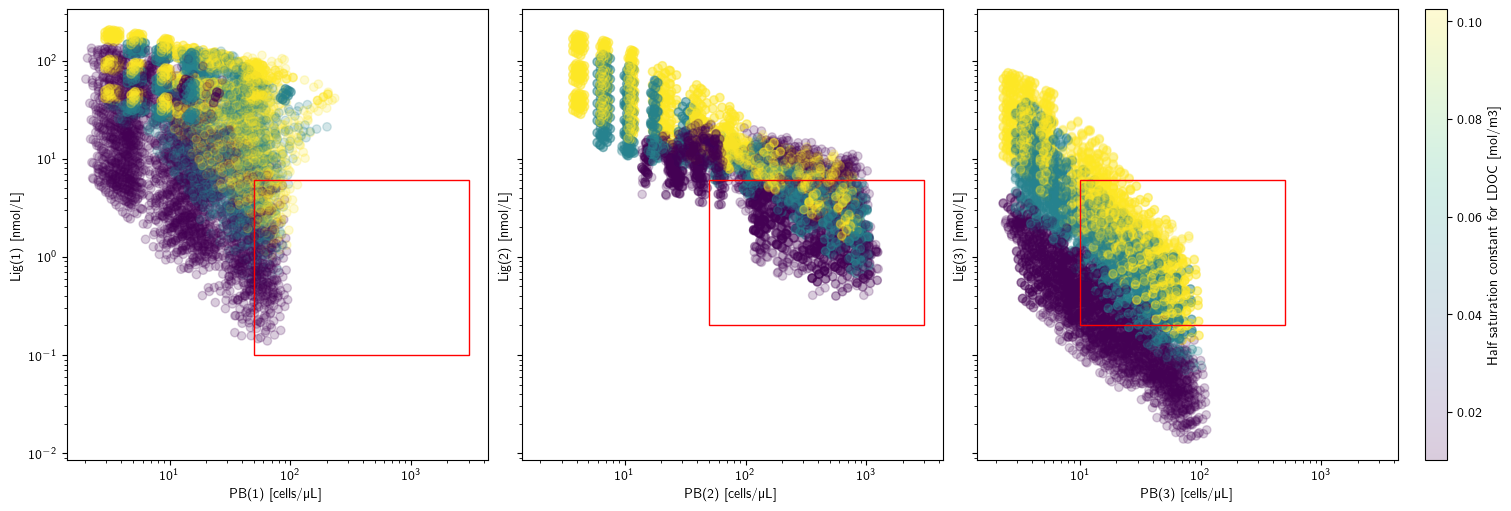

In [50]:
### Scatterplot of Fe(3) vs Lig(3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs Lig(1)
sc1 = axs[0].scatter(data18_2['PB(1)'], data18_2['Lig(1)'], c=data18_2['kldoc_p'], cmap='viridis', marker='o', alpha=0.2)
axs[0].set_xlabel('PB(1) [cells/µL]')
axs[0].set_ylabel('Lig(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((50, 0.1), 3000 - 50, 6 - 0.1, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Ligand concentration: limited data LFe: n=7 for GEOTRACES ~[0.3 - 1.2] nmol/kg
### L1Fe and L2Fe do not even have any measurements, so there is too much uncertainty to say anything
### https://doi.org/10.1016/S0967-0637(00)00099-6: 0.72±0.23 nM
### https://doi.org/10.1016/j.dsr2.2011.05.028: 0.5 - 1.5 nM (very specific location, Tasmania, Fe concentrations that were measured were higher)
### https://doi.org/10.3389/fmars.2022.948772: has a table with the results of other studies
### Suggested range: 0.04 - 6.5 nmol eq Fe (units due to measurement protocol)
### Conservative range: 0.1 - 6 nmol/kg

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(2) vs Lig(2)
sc2 = axs[1].scatter(data18_2['PB(2)'], data18_2['Lig(2)'], c=data18_2['kldoc_p'], cmap='viridis', marker='o', alpha=0.2)
axs[1].set_xlabel('PB(2) [cells/µL]')
axs[1].set_ylabel('Lig(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((50, 0.2), 3000 - 50, 6 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Ligand concentration estimated from GEOTRACES
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range

# Scatter plot for Fe(3) vs Lig(3)
sc3 = axs[2].scatter(data18_2['PB(3)'], data18_2['Lig(3)'], c=data18_2['kldoc_p'], cmap='viridis', marker='o', alpha=0.2)
axs[2].set_xlabel('PB(3) [cells/µL]')
axs[2].set_ylabel('Lig(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((10, 0.2), 500 - 10, 6 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above

cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Half saturation constant for LDOC [mol/m3]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Generally ne


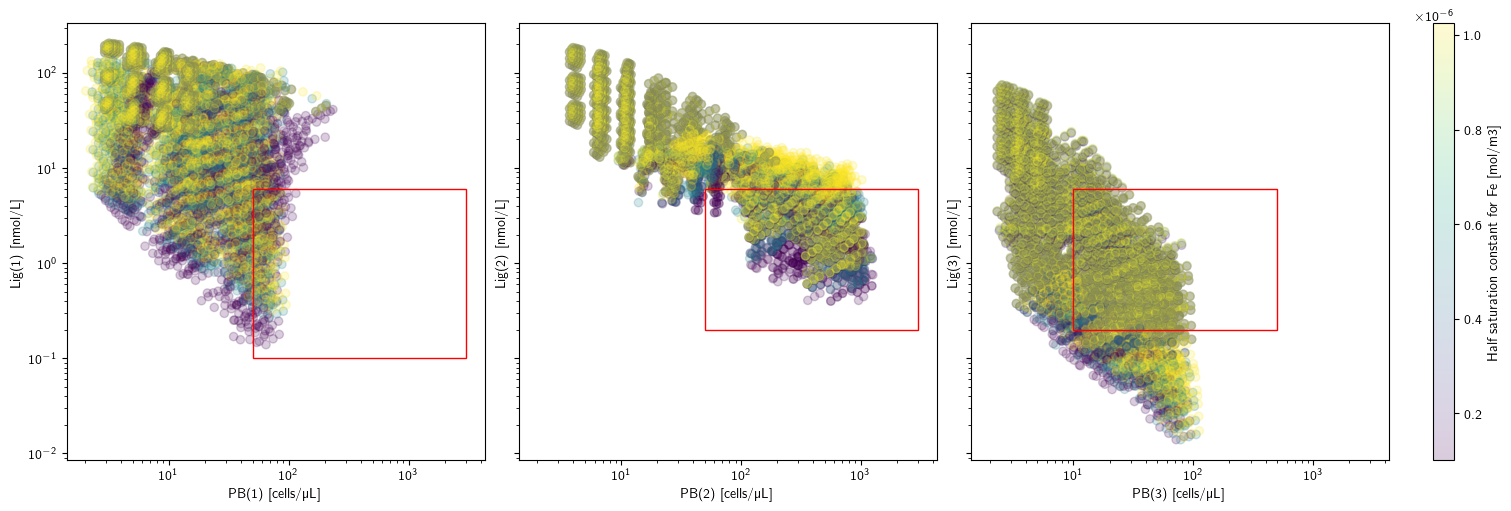

In [51]:
### Scatterplot of Fe(3) vs Lig(3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs Lig(1)
sc1 = axs[0].scatter(data18_2['PB(1)'], data18_2['Lig(1)'], c=data18_2['kfe_p'], cmap='viridis', marker='o', alpha=0.2)
axs[0].set_xlabel('PB(1) [cells/µL]')
axs[0].set_ylabel('Lig(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((50, 0.1), 3000 - 50, 6 - 0.1, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Ligand concentration: limited data LFe: n=7 for GEOTRACES ~[0.3 - 1.2] nmol/kg
### L1Fe and L2Fe do not even have any measurements, so there is too much uncertainty to say anything
### https://doi.org/10.1016/S0967-0637(00)00099-6: 0.72±0.23 nM
### https://doi.org/10.1016/j.dsr2.2011.05.028: 0.5 - 1.5 nM (very specific location, Tasmania, Fe concentrations that were measured were higher)
### https://doi.org/10.3389/fmars.2022.948772: has a table with the results of other studies
### Suggested range: 0.04 - 6.5 nmol eq Fe (units due to measurement protocol)
### Conservative range: 0.1 - 6 nmol/kg

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(2) vs Lig(2)
sc2 = axs[1].scatter(data18_2['PB(2)'], data18_2['Lig(2)'], c=data18_2['kfe_p'], cmap='viridis', marker='o', alpha=0.2)
axs[1].set_xlabel('PB(2) [cells/µL]')
axs[1].set_ylabel('Lig(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((50, 0.2), 3000 - 50, 6 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Ligand concentration estimated from GEOTRACES
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range

# Scatter plot for Fe(3) vs Lig(3)
sc3 = axs[2].scatter(data18_2['PB(3)'], data18_2['Lig(3)'], c=data18_2['kfe_p'], cmap='viridis', marker='o', alpha=0.2)
axs[2].set_xlabel('PB(3) [cells/µL]')
axs[2].set_ylabel('Lig(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((10, 0.2), 500 - 10, 6 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above

cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Half saturation constant for Fe [mol/m3]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Generally ne
